# The Road Back to Running Shape with the Apple Watch

Running is a fun activity, but I rarely run for over six years prior to acquiring an Apple Watch. The Apple Watch became a fun tool that got me back into running shape.

## Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/running-stories/apple-watch-tracking"

In [5]:
runs = pd.read_csv(f"{study_path}/apple_watch_runs_summary.csv",parse_dates=['start_date'])

## Annual Run Miles

In [10]:
runstats = runs.groupby(by=runs['year']).sum()

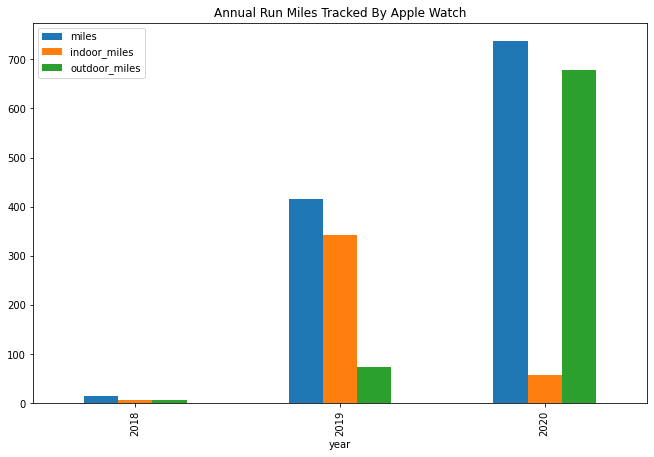

In [11]:
runstats_bp = runstats.plot.bar(y=['miles', 'indoor_miles', 'outdoor_miles'], 
                                title='Annual Run Miles Tracked By Apple Watch', 
                                figsize=(11, 7))

I started using the Apple Watch in late 2018 but it took a few months to get back into running.

In [12]:
runstats.loc[:, ["miles", "indoor_miles", "outdoor_miles"]]

,miles,indoor_miles,outdoor_miles
year,,,
2018,14.698,6.847,7.851
2019,416.406,342.334,74.072
2020,737.183,58.570,678.613


In [13]:
runstats_bp.get_figure().savefig(f"{study_path}/annual_run_miles")

### Annual Minimum 5K Runs

In [14]:
runs_5k_min = runs.loc[runs['miles'] >= 3.10]

In [15]:
runs_5k_min_by_year = runs_5k_min.groupby('year').count()

In [16]:
runs_5k_min_by_year

,start_date,miles,minutes,indoor_miles,outdoor_miles,year_month
year,,,,,,
2018,1,1,1,0,1,1
2019,55,55,55,44,11,55
2020,127,127,127,0,127,127


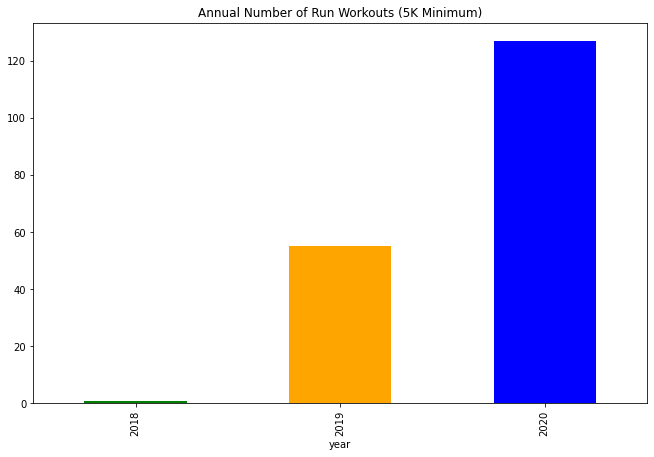

In [17]:
runstats_5k_min_bp = runs_5k_min_by_year.plot.bar(
    y='miles', legend=False, 
    title='Annual Number of Run Workouts (5K Minimum)',
    color=["green", "orange", "blue"],
    figsize=(11, 7))

#### Breakdown of 5K-Minimum Runs per Year

In [18]:
runs_5k_min_by_year.loc[:, ["miles"]]

,miles
year,
2018,1
2019,55
2020,127


In [19]:
runstats_5k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_5k_min")

## Annual Minimum 10K Runs

In [20]:
runs_10k_min = runs.loc[runs['miles'] >= 6.20]

In [21]:
runs_10k_min_by_year = runs_10k_min.groupby('year').count()

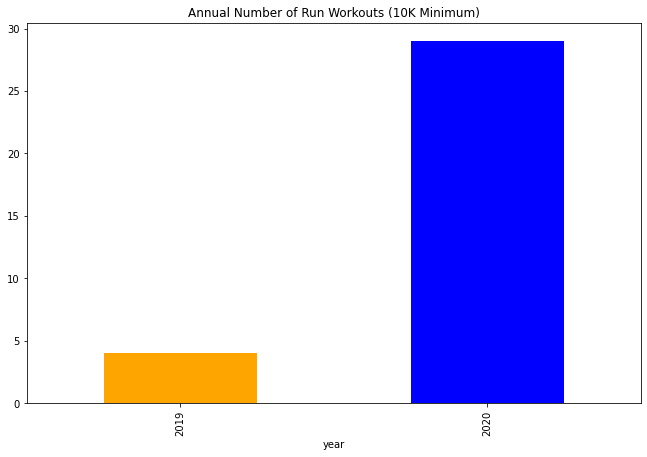

In [22]:
runstats_10k_min_bp = runs_10k_min_by_year.plot.bar(
    y='miles', color=['orange', 'blue'], 
    legend=False, 
    title='Annual Number of Run Workouts (10K Minimum)', 
    figsize=(11, 7))

In [23]:
runs_10k_min_by_year.loc[:, ["miles"]]

,miles
year,
2019,4
2020,29


In [24]:
runstats_10k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_10k_min")

## Covid Lockdown

It has been a strange and tough year because of the Covid-19 virus. Since there are fewer cars and people on the streets, running outside turned out to be safe activity.

In [25]:
covidlockdown_period = runs[runs['start_date'] >= "2020-03-17"]

### Covid Miles

In [26]:
covid_miles = round(covidlockdown_period.sum()['miles'], 2)

In [27]:
covid_miles

675.78

### Covid Statistics

In [28]:
covidlockdown_period.describe().loc[:, ["outdoor_miles"]]

,outdoor_miles
count,152.000000
mean,4.445895
std,1.770733
min,0.144000
25%,3.246000
50%,4.421000
75%,5.621750
max,9.334000
